In [114]:
## Imports
import pandas as pd
import json
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing


In [115]:
all = pd.read_pickle("../climate_classifier/scored_data/votes_data_all_expanded_politician.pkl")
votes = pd.read_pickle("../climate_classifier/scored_data/votes_data_all.pkl")

In [116]:
votes["year"] = votes["date"].astype("str").str[:4]
print(len(votes))
votes = votes[votes["year"].astype("int")>=2012]


5559


In [117]:
all = all.reset_index(drop=True)
all["year"] = all["date"].astype("str").str[:4]
df = all[all["year"].astype("int")>=2012]

In [118]:
df[["For", "Absent", "Neither", "Against"]] = pd.get_dummies(df["vote"])
df.sort_values(by="date").head(2)

c:\Users\COBOD\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,party,politician,vote,description,date,vote_id,y_pred,vote_id2,year,For,Absent,Neither,Against
590065,Socialistisk Folkeparti (SF),Özlem Sara Cekic,Fraværende,Loven skal gøre beskæftigelsesindsatsen mere i...,2012-01-15,"Afstemning nr. 8, 2011-12",non-climate,5257,2012,0,1,0,0
589949,Socialdemokratiet (S),Jens Joel,For,Loven skal gøre beskæftigelsesindsatsen mere i...,2012-01-15,"Afstemning nr. 8, 2011-12",non-climate,5257,2012,1,0,0,0


In [120]:
df = df[["politician", "party", "For", "Against", "Neither", "Absent", "description", "vote_id2", "date", "y_pred"]]
df.sample(5)

,politician,party,For,Against,Neither,Absent,description,vote_id2,date,y_pred
349967,Marianne Jelved,Det Radikale Venstre (RV),0,1,0,0,Forslaget pålægger regeringen at arbejde for i...,4966,2016-06-03,non-climate
521194,Doris Jakobsen,Siumut (SIU),0,0,0,1,Beslutningsforslaget pålagde regeringen inden ...,2790,2013-04-30,non-climate
302017,Henrik Sass Larsen,Socialdemokratiet (S),0,0,0,1,Med lovforslaget skærpes en række betingelser ...,2484,2017-05-09,non-climate
261901,Claus Hjort Frederiksen,Venstre (V),0,0,0,1,Formålet med lovforslaget er at gøre sundhedsv...,29,2017-12-26,non-climate
403244,Flemming Damgaard Larsen,Venstre (V),0,0,1,0,I anledning af 100-året for de tvangsdeportati...,3437,2015-05-12,non-climate


### General description

#### General stats

In [135]:
df.nunique()

politician      408
party            19
For               2
Against           2
Neither           2
Absent            2
description    3296
vote_id2       3296
date            725
y_pred            2
climate           2
non-climate       2
dtype: int64

In [136]:
#pd.DataFrame(df["politician"].unique()).to_csv("sanity_check_pol_votes.csv")

In [137]:
climate = df[df["y_pred"]=="climate"]
non_climate = df[df["y_pred"]=="non-climate"]
print(len(climate))
print(len(non_climate))
print(len(df))
climate.nunique()

42965
547101
590066


politician     398
party           19
For              2
Against          2
Neither          2
Absent           2
description    240
vote_id2       240
date           151
y_pred           1
climate          1
non-climate      1
dtype: int64

In [138]:
non_climate.nunique()

politician      406
party            19
For               2
Against           2
Neither           2
Absent            2
description    3056
vote_id2       3056
date            688
y_pred            1
climate           1
non-climate       1
dtype: int64

#### Distributions of vote-outcomes

In [139]:
parties_selection = ["Socialdemokratiet (S)", "Venstre (V)", "Socialistisk Folkeparti (SF)", "Det Konservative Folkeparti (KF)", "Dansk Folkeparti (DF)", "Enhedslisten (EL)"
                    ,"Det Radikale Venstre (RV)", "Alternativet (ALT)", "Liberal Alliance (LA)"]
print(len(df))
df_selection = df[df["party"].isin(parties_selection)]
df_selection
print(len(df_selection))
df_selection

590066
567350


,politician,party,For,Against,Neither,Absent,description,vote_id2,date,y_pred,climate,non-climate
1,Alex Ahrendtsen,Dansk Folkeparti (DF),1,0,0,0,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate,0,1
2,Alex Vanopslagh,Liberal Alliance (LA),0,0,0,1,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate,0,1
3,Anders Kronborg,Socialdemokratiet (S),0,1,0,0,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate,0,1
4,Andreas Steenberg,Det Radikale Venstre (RV),0,1,0,0,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate,0,1
5,Ane Halsboe-Jørgensen,Socialdemokratiet (S),0,0,0,1,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
590061,Ulla Tørnæs,Venstre (V),1,0,0,0,Loven skal gøre beskæftigelsesindsatsen mere i...,5257,2012-01-15,non-climate,0,1
590062,Villum Christensen,Liberal Alliance (LA),0,0,1,0,Loven skal gøre beskæftigelsesindsatsen mere i...,5257,2012-01-15,non-climate,0,1
590063,Villy Søvndal,Socialistisk Folkeparti (SF),0,0,0,1,Loven skal gøre beskæftigelsesindsatsen mere i...,5257,2012-01-15,non-climate,0,1
590064,Zenia Stampe,Det Radikale Venstre (RV),1,0,0,0,Loven skal gøre beskæftigelsesindsatsen mere i...,5257,2012-01-15,non-climate,0,1


In [140]:
df_agree = df_selection.groupby(["party","y_pred"]).sum()[["For", "Against", "Neither", "Absent"]]
df_agree.head(4)

For  Against  Neither   Absent
party                 y_pred                                         
Alternativet (ALT)    climate        357.0    191.0     21.0    358.0
                      non-climate   5193.0   2792.0    243.0   5521.0
Dansk Folkeparti (DF) climate       2392.0    982.0    135.0   2428.0
                      non-climate  35105.0  11782.0   1338.0  32763.0

In [141]:
df_agree["Total"] = df_agree["For"]+df_agree["Against"]+df_agree["Neither"]
df_agree["Agree"] = df_agree["For"]/df_agree["Total"]
df_agree["Indifferent"] = df_agree["Neither"]/df_agree["Total"]
df_agree["Disagree"] = df_agree["Against"]/df_agree["Total"]
df_agree["Absence"] = df_agree["Absent"]/df_agree["Total"]
df_agree = df_agree.append(pd.DataFrame(df_agree.sum(axis=0)).transpose())
df_agree["party"] = df_agree.index
df_agree

,For,Against,Neither,Absent,Total,Agree,Indifferent,Disagree,Absence,party
"(Alternativet (ALT), climate)",357.0,191.0,21.0,358.0,569.0,0.627417,0.036907,0.335677,0.629174,"(Alternativet (ALT), climate)"
"(Alternativet (ALT), non-climate)",5193.0,2792.0,243.0,5521.0,8228.0,0.631138,0.029533,0.339329,0.671001,"(Alternativet (ALT), non-climate)"
"(Dansk Folkeparti (DF), climate)",2392.0,982.0,135.0,2428.0,3509.0,0.681676,0.038472,0.279852,0.691935,"(Dansk Folkeparti (DF), climate)"
"(Dansk Folkeparti (DF), non-climate)",35105.0,11782.0,1338.0,32763.0,48225.0,0.727942,0.027745,0.244313,0.679378,"(Dansk Folkeparti (DF), non-climate)"
"(Det Konservative Folkeparti (KF), climate)",892.0,372.0,10.0,875.0,1274.0,0.700157,0.007849,0.291994,0.686813,"(Det Konservative Folkeparti (KF), climate)"
"(Det Konservative Folkeparti (KF), non-climate)",10732.0,4580.0,89.0,10263.0,15401.0,0.696838,0.005779,0.297383,0.666385,"(Det Konservative Folkeparti (KF), non-climate)"
"(Det Radikale Venstre (RV), climate)",1497.0,381.0,16.0,1301.0,1894.0,0.790391,0.008448,0.201162,0.686906,"(Det Radikale Venstre (RV), climate)"
"(Det Radikale Venstre (RV), non-climate)",16068.0,6975.0,224.0,15675.0,23267.0,0.690592,0.009627,0.299781,0.673701,"(Det Radikale Venstre (RV), non-climate)"
"(Enhedslisten (EL), climate)",1336.0,531.0,42.0,1213.0,1909.0,0.699843,0.022001,0.278156,0.635411,"(Enhedslisten (EL), climate)"
"(Enhedslisten (EL), non-climate)",14895.0,9216.0,713.0,15137.0,24824.0,0.600024,0.028722,0.371254,0.609773,"(Enhedslisten (EL), non-climate)"


In [142]:
df_agree[["Agree", "Indifferent", "Disagree", "Absence"]].describe()

,Agree,Indifferent,Disagree,Absence
count,19.000000,19.000000,19.000000,19.000000
mean,1.309769,0.031925,0.553043,1.261188
std,2.696615,0.066565,1.139661,2.596141
min,0.571429,0.005116,0.187788,0.609773
25%,0.676031,0.008544,0.279004,0.645903
50%,0.696838,0.014577,0.296070,0.671001
75%,0.715367,0.028234,0.324520,0.686860
max,12.442807,0.303289,5.253904,11.981284


In [143]:
df_agree_all = df_agree[["For", "Against", "Neither", "Absent"]]
df_agree_all = df_agree_all.groupby("y_pred").sum()
df_agree_all = df_agree_all.append(pd.DataFrame(df_agree_all.sum(axis=0)).transpose())
df_agree_all.head(4)


KeyError: 'y_pred'

In [ ]:
df_agree_all["Total"] = df_agree_all["For"]+df_agree_all["Against"]+df_agree_all["Neither"]
df_agree_all["Agree"] = df_agree_all["For"]/df_agree_all["Total"]
df_agree_all["Indifferent"] = df_agree_all["Neither"]/df_agree_all["Total"]
df_agree_all["Disagree"] = df_agree_all["Against"]/df_agree_all["Total"]
df_agree_all["Absence"] = df_agree_all["Absent"]/df_agree_all["Total"]
df_agree_all.head(4)

In [ ]:
import seaborn as sns

<AxesSubplot:>

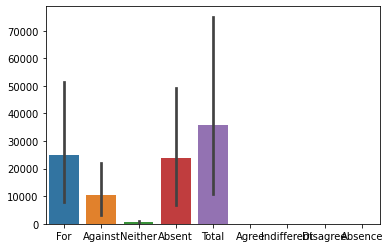

In [ ]:
sns.barplot(data=df_agree)

#### Absence

In [ ]:
parties_selection = ["Socialdemokratiet (S)", "Venstre (V)", "Socialistisk Folkeparti (SF)", "Det Konservative Folkeparti (KF)", "Dansk Folkeparti (DF)", "Enhedslisten (EL)"
                    ,"Det Radikale Venstre (RV)", "Alternativet (ALT)", "Liberal Alliance (LA)"]
print(len(df))
df_selection = df[df["party"].isin(parties_selection)]
df_selection
print(len(df_selection))
df_selection

590066
567350


,politician,party,For,Against,Neither,Absent,description,vote_id2,date,y_pred
1,Alex Ahrendtsen,Dansk Folkeparti (DF),1,0,0,0,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate
2,Alex Vanopslagh,Liberal Alliance (LA),0,0,0,1,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate
3,Anders Kronborg,Socialdemokratiet (S),0,1,0,0,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate
4,Andreas Steenberg,Det Radikale Venstre (RV),0,1,0,0,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate
5,Ane Halsboe-Jørgensen,Socialdemokratiet (S),0,0,0,1,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate
...,...,...,...,...,...,...,...,...,...,...
590061,Ulla Tørnæs,Venstre (V),1,0,0,0,Loven skal gøre beskæftigelsesindsatsen mere i...,5257,2012-01-15,non-climate
590062,Villum Christensen,Liberal Alliance (LA),0,0,1,0,Loven skal gøre beskæftigelsesindsatsen mere i...,5257,2012-01-15,non-climate
590063,Villy Søvndal,Socialistisk Folkeparti (SF),0,0,0,1,Loven skal gøre beskæftigelsesindsatsen mere i...,5257,2012-01-15,non-climate
590064,Zenia Stampe,Det Radikale Venstre (RV),1,0,0,0,Loven skal gøre beskæftigelsesindsatsen mere i...,5257,2012-01-15,non-climate


In [ ]:
df_abs = df_selection
df_abs['present'] = df_abs["Absent"].apply(lambda x: 1 if x == 0 else 0)
df_abs['no_votes'] = df_abs["For"] + df_abs["Against"] + df_abs["Neither"] + df_abs["Absent"]
df_abs_c = df_abs[df_abs["y_pred"]=="climate"]
print(len(df_abs_c))
print(len(df_abs))
df_abs

41125
567350


C:\Users\COBOD\AppData\Local\Temp\ipykernel_15020\3864179901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abs['present'] = df_abs["Absent"].apply(lambda x: 1 if x == 0 else 0)
C:\Users\COBOD\AppData\Local\Temp\ipykernel_15020\3864179901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abs['no_votes'] = df_abs["For"] + df_abs["Against"] + df_abs["Neither"] + df_abs["Absent"]


,politician,party,For,Against,Neither,Absent,description,vote_id2,date,y_pred,present,no_votes
1,Alex Ahrendtsen,Dansk Folkeparti (DF),1,0,0,0,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate,1,1
2,Alex Vanopslagh,Liberal Alliance (LA),0,0,0,1,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate,0,1
3,Anders Kronborg,Socialdemokratiet (S),0,1,0,0,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate,1,1
4,Andreas Steenberg,Det Radikale Venstre (RV),0,1,0,0,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate,1,1
5,Ane Halsboe-Jørgensen,Socialdemokratiet (S),0,0,0,1,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
590061,Ulla Tørnæs,Venstre (V),1,0,0,0,Loven skal gøre beskæftigelsesindsatsen mere i...,5257,2012-01-15,non-climate,1,1
590062,Villum Christensen,Liberal Alliance (LA),0,0,1,0,Loven skal gøre beskæftigelsesindsatsen mere i...,5257,2012-01-15,non-climate,1,1
590063,Villy Søvndal,Socialistisk Folkeparti (SF),0,0,0,1,Loven skal gøre beskæftigelsesindsatsen mere i...,5257,2012-01-15,non-climate,0,1
590064,Zenia Stampe,Det Radikale Venstre (RV),1,0,0,0,Loven skal gøre beskæftigelsesindsatsen mere i...,5257,2012-01-15,non-climate,1,1


In [ ]:
to_join = df_abs.groupby(['politician', 'party']).count()

presence = df_abs.groupby(['politician', 'party']).sum()


presence['overall_presence'] = presence.apply(lambda x: x.present/x.no_votes, axis=1)
presence = presence[presence["no_votes"]>200]

bot20 = presence.sort_values(by="overall_presence").reset_index().head(20)[["politician", "party", "For", "Against", "Neither", "no_votes", "overall_presence"]]
bot20["politician"] = bot20["politician"].str.strip()
bot20


,politician,party,For,Against,Neither,no_votes,overall_presence
0,Lars Løkke Rasmussen,Venstre (V),32.0,10.0,0.0,2775.0,0.015135
1,Helle Thorning-Schmidt,Socialdemokratiet (S),18.0,2.0,0.0,1234.0,0.016207
2,Bjarne Corydon,Socialdemokratiet (S),41.0,23.0,0.0,1173.0,0.054561
3,Nicolai Wammen,Socialdemokratiet (S),207.0,71.0,3.0,3296.0,0.085255
4,Kristian Thulesen Dahl,Dansk Folkeparti (DF),242.0,100.0,4.0,3296.0,0.104976
5,Peter Skaarup,Dansk Folkeparti (DF),282.0,90.0,8.0,3296.0,0.115291
6,Pia Kjærsgaard,Dansk Folkeparti (DF),341.0,44.0,7.0,3294.0,0.119004
7,Morten Østergaard,Det Radikale Venstre (RV),271.0,85.0,1.0,2625.0,0.136000
8,Claus Hjort Frederiksen,Venstre (V),276.0,180.0,15.0,3296.0,0.142900
9,Martin Henriksen,Dansk Folkeparti (DF),241.0,100.0,20.0,2409.0,0.149855


In [ ]:
top20 = presence.sort_values(by="overall_presence",ascending=False).reset_index().head(20)[["politician", "party", "For", "Against", "Neither", "no_votes", "overall_presence"]]
top20["politician"] = top20["politician"].str.strip()
top20

,politician,party,For,Against,Neither,no_votes,overall_presence
0,Hans Vestager,Det Radikale Venstre (RV),149.0,49.0,0.0,201.0,0.985075
1,Morten Dahlin,Venstre (V),548.0,278.0,21.0,887.0,0.954904
2,Malou Lunderød,Socialdemokratiet (S),224.0,90.0,9.0,341.0,0.947214
3,Eyvind Vesselbo,Venstre (V),713.0,293.0,20.0,1087.0,0.943882
4,Sanne Bjørn,Det Radikale Venstre (RV),118.0,80.0,2.0,212.0,0.943396
5,Per Husted,Socialdemokratiet (S),484.0,166.0,13.0,703.0,0.943101
6,Flemming Damgaard Larsen,Venstre (V),689.0,295.0,22.0,1087.0,0.925483
7,Kenneth Mikkelsen,Venstre (V),223.0,140.0,16.0,410.0,0.924390
8,Stén Knuth,Venstre (V),524.0,273.0,21.0,887.0,0.922210
9,Mads Andersen,Det Konservative Folkeparti (KF),133.0,94.0,0.0,258.0,0.879845


In [ ]:
titles = pd.read_pickle("../data_collection/meetings/ft_meetings_2012-2022_clean_v2.2.pkl")
titles["politician"] = titles["politician"].str.strip()

In [ ]:
titles_1 = titles.groupby("politician")["title"].unique().reset_index()
titles_2 = titles_1.groupby("politician")["title"].sum().reset_index()
titles_2.sample(10)

,politician,title
123,Henrik Vinther,[Member]
180,Karsten Hønge,[Member]
348,Serdal Benli,[Member]
60,Charlotte Broman Mølbæk,[Member]
400,Villy Søvndal,[Udenrigsministeren]
391,Trine Torp,[Member]
321,Pia Adelsteen,[Member]
147,Jeppe Jakobsen,[Member]
335,René Gade,[Member]
251,Martin Geertsen,[Member]


In [ ]:
bot20_titles = bot20.merge(titles_2, how="left", on = "politician")
bot20_titles.head(10)

,politician,party,For,Against,Neither,no_votes,overall_presence,title
0,Lars Løkke Rasmussen,Venstre (V),32.0,10.0,0.0,2775.0,0.015135,"[Member, Statsministeren]"
1,Helle Thorning-Schmidt,Socialdemokratiet (S),18.0,2.0,0.0,1234.0,0.016207,[Statsministeren]
2,Bjarne Corydon,Socialdemokratiet (S),41.0,23.0,0.0,1173.0,0.054561,[Finansministeren]
3,Nicolai Wammen,Socialdemokratiet (S),207.0,71.0,3.0,3296.0,0.085255,"[Europaministeren, Forsvarsministeren, Member,..."
4,Kristian Thulesen Dahl,Dansk Folkeparti (DF),242.0,100.0,4.0,3296.0,0.104976,[Member]
5,Peter Skaarup,Dansk Folkeparti (DF),282.0,90.0,8.0,3296.0,0.115291,[Member]
6,Pia Kjærsgaard,Dansk Folkeparti (DF),341.0,44.0,7.0,3294.0,0.119004,[Member]
7,Morten Østergaard,Det Radikale Venstre (RV),271.0,85.0,1.0,2625.0,0.136000,"[Ministeren for forskning, innovation og vider..."
8,Claus Hjort Frederiksen,Venstre (V),276.0,180.0,15.0,3296.0,0.142900,"[Member, Finansministeren, Forsvarsministeren]"
9,Martin Henriksen,Dansk Folkeparti (DF),241.0,100.0,20.0,2409.0,0.149855,[Member]


In [ ]:
top20_titles = top20.merge(titles_2, how="left", on = "politician")
top20_titles.head(20)

,politician,party,For,Against,Neither,no_votes,overall_presence,title
0,Hans Vestager,Det Radikale Venstre (RV),149.0,49.0,0.0,201.0,0.985075,[Member]
1,Morten Dahlin,Venstre (V),548.0,278.0,21.0,887.0,0.954904,[Member]
2,Malou Lunderød,Socialdemokratiet (S),224.0,90.0,9.0,341.0,0.947214,[Member]
3,Eyvind Vesselbo,Venstre (V),713.0,293.0,20.0,1087.0,0.943882,[Member]
4,Sanne Bjørn,Det Radikale Venstre (RV),118.0,80.0,2.0,212.0,0.943396,[Member]
5,Per Husted,Socialdemokratiet (S),484.0,166.0,13.0,703.0,0.943101,[Member]
6,Flemming Damgaard Larsen,Venstre (V),689.0,295.0,22.0,1087.0,0.925483,[Member]
7,Kenneth Mikkelsen,Venstre (V),223.0,140.0,16.0,410.0,0.924390,[Member]
8,Stén Knuth,Venstre (V),524.0,273.0,21.0,887.0,0.922210,[Member]
9,Mads Andersen,Det Konservative Folkeparti (KF),133.0,94.0,0.0,258.0,0.879845,[Member]


In [ ]:
presence_c = df_abs_c.groupby(['politician', 'party']).sum()
votes_c = votes[votes["y_pred"]=="climate"]


presence_c['overall_presence'] = presence_c.apply(lambda x: x.present/x.no_votes, axis=1)
presence_c = presence_c[presence_c["no_votes"]>200]

top20_c = presence_c.sort_values(by="overall_presence").reset_index().head(20)[["politician", "party", "For", "Against", "Neither", "no_votes", "overall_presence"]]
top20_c["politician"] = top20_c["politician"].str.strip()
top20_c

,politician,party,For,Against,Neither,no_votes,overall_presence
0,Nicolai Wammen,Socialdemokratiet (S),11,3,0,240,0.058333
1,Claus Hjort Frederiksen,Venstre (V),15,7,1,240,0.095833
2,Pia Kjærsgaard,Dansk Folkeparti (DF),25,5,1,240,0.129167
3,Kristian Thulesen Dahl,Dansk Folkeparti (DF),13,17,1,240,0.129167
4,Peter Skaarup,Dansk Folkeparti (DF),21,14,1,240,0.150000
5,Mette Frederiksen,Socialdemokratiet (S),35,5,0,240,0.166667
6,Pia Olsen Dyhr,Socialistisk Folkeparti (SF),41,8,0,240,0.204167
7,Søren Espersen,Dansk Folkeparti (DF),28,22,0,239,0.209205
8,Kristian Jensen,Venstre (V),29,18,0,205,0.229268
9,Henrik Dam Kristensen,Socialdemokratiet (S),45,12,0,240,0.237500


In [ ]:
top20_c_titles = top20_c.merge(titles_2, how="left", on = "politician")
top20_c_titles.head(10)

,politician,party,For,Against,Neither,no_votes,overall_presence,title
0,Nicolai Wammen,Socialdemokratiet (S),11,3,0,240,0.058333,"[Europaministeren, Forsvarsministeren, Member,..."
1,Claus Hjort Frederiksen,Venstre (V),15,7,1,240,0.095833,"[Member, Finansministeren, Forsvarsministeren]"
2,Pia Kjærsgaard,Dansk Folkeparti (DF),25,5,1,240,0.129167,[Member]
3,Kristian Thulesen Dahl,Dansk Folkeparti (DF),13,17,1,240,0.129167,[Member]
4,Peter Skaarup,Dansk Folkeparti (DF),21,14,1,240,0.150000,[Member]
5,Mette Frederiksen,Socialdemokratiet (S),35,5,0,240,0.166667,"[Beskæftigelsesministeren, Justitsministeren, ..."
6,Pia Olsen Dyhr,Socialistisk Folkeparti (SF),41,8,0,240,0.204167,"[Handels- og investeringsministeren, Transport..."
7,Søren Espersen,Dansk Folkeparti (DF),28,22,0,239,0.209205,[Member]
8,Kristian Jensen,Venstre (V),29,18,0,205,0.229268,"[Member, Udenrigsministeren, Finansministeren,..."
9,Henrik Dam Kristensen,Socialdemokratiet (S),45,12,0,240,0.237500,"[Transportministeren, Member, Beskæftigelsesmi..."


In [ ]:
print(24598.0/41125.0)
df_abs_c[["no_votes", "present"]].sum()


0.5981276595744681


no_votes    41125
present     24598
dtype: int64

In [ ]:
print(341026.0/567350.0)
df_abs[["no_votes", "present"]].sum()


0.6010857495373226


no_votes    567350
present     341026
dtype: int64

### Temporal

#### Proportion

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['climate'] = df['y_pred'].apply(lambda x: 1 if x=="climate" else 0)
df['non-climate'] = df['y_pred'].apply(lambda x: 1 if x=="non-climate" else 0)
df.head(1)

,politician,party,For,Against,Neither,Absent,description,vote_id2,date,y_pred,climate,non-climate
0,Aki-Matilda Høegh-Dam,Siumut (SIU),0,0,0,1,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate,0,1


In [ ]:

quarterly = df.groupby(df['date'].dt.to_period('Q')).agg({'climate': 'sum', 'non-climate':'sum'})
quarterly['percentage_climate'] = quarterly.apply(lambda x: (x['climate']/(x['climate']+x['non-climate']))*100, axis=1)

view = pd.DataFrame(quarterly.drop(columns=['climate', 'non-climate']))

In [ ]:
## Drop Q3
view["date2"] = view.index.astype(str)
viewQ = view[(view["date2"].str.endswith("Q1"))|(view["date2"].str.endswith("Q2"))|(view["date2"].str.endswith("Q4"))]
viewQ.describe()

,percentage_climate
count,31.000000
mean,7.530034
std,3.026387
min,3.448276
25%,5.228321
50%,7.142857
75%,8.749701
max,17.307692


In [ ]:
yearly = df.groupby(df['date'].dt.to_period('Y')).agg({'climate': 'sum', 'non-climate':'sum'})
yearly['percentage_climate'] = yearly.apply(lambda x: (x['climate']/(x['climate']+x['non-climate']))*100, axis=1)

view2 = yearly.drop(columns=['climate', 'non-climate'])

## Comment out to get from 2012 ->
view2["date2"] = view2.index.astype(str)
view2.head(1)

,percentage_climate,date2
date,,
2012,8.626261,2012


C:\Users\COBOD\AppData\Local\Temp\ipykernel_16760\418275884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viewQ["Quarters"] = viewQ["date2"]
C:\Users\COBOD\AppData\Local\Temp\ipykernel_16760\418275884.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viewQ["Percentage of climate"] = viewQ["percentage_climate"]


([<matplotlib.axis.XTick at 0x19b4395a7c0>,
 [Text(0, 0, '2012Q1'),
  Text(1, 0, '2012Q2'),
  Text(2, 0, '2012Q4'),
  Text(3, 0, '2013Q1'),
  Text(4, 0, '2013Q2'),
  Text(5, 0, '2013Q4'),
  Text(6, 0, '2014Q1')])

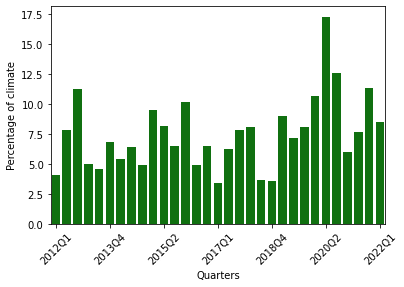

In [ ]:
import seaborn as sns
viewQ["Quarters"] = viewQ["date2"]
viewQ["Percentage of climate"] = viewQ["percentage_climate"]
g = sns.barplot(data=viewQ, x="Quarters", y="Percentage of climate", color="green")
plt.xticks([0, 5, 10, 15, 20, 25, 30],rotation=45)
#viewQ.plot()
#view2.plot()
#plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '2012'),
  Text(1, 0, '2013'),
  Text(2, 0, '2014'),
  Text(3, 0, '2015'),
  Text(4, 0, '2016'),
  Text(5, 0, '2017'),
  Text(6, 0, '2018'),
  Text(7, 0, '2019'),
  Text(8, 0, '2020'),
  Text(9, 0, '2021'),
  Text(10, 0, '2022')])

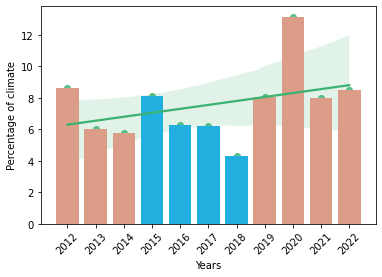

In [ ]:
view2["Years"] = view2["date2"]
view2["Percentage of climate"] = view2["percentage_climate"]
g = sns.barplot(data=view2, x="Years", y="Percentage of climate", palette=['darksalmon', 'darksalmon', 'darksalmon', 'deepskyblue', 'deepskyblue', 'deepskyblue', 'deepskyblue', 'darksalmon', 'darksalmon', 'darksalmon'])
view2["Years"] = range(len(view2))
g = sns.regplot(x="Years", y="Percentage of climate", data=view2, color="mediumseagreen")

plt.xticks(rotation=45)

In [ ]:
view2.describe()

,percentage_climate,Years,Percentage of climate,X
count,11.000000,11.000000,11.000000,11.000000
mean,7.547171,5.000000,7.547171,5.000000
std,2.314981,3.316625,2.314981,3.316625
min,4.325700,0.000000,4.325700,0.000000
25%,6.125929,2.500000,6.125929,2.500000
50%,8.016878,5.000000,8.016878,5.000000
75%,8.303902,7.500000,8.303902,7.500000
max,13.147410,10.000000,13.147410,10.000000


#### Consensus

In [193]:
parties_selection = ["Socialdemokratiet (S)", "Venstre (V)", "Socialistisk Folkeparti (SF)", "Det Konservative Folkeparti (KF)", "Dansk Folkeparti (DF)", "Enhedslisten (EL)"
                    ,"Det Radikale Venstre (RV)", "Alternativet (ALT)", "Liberal Alliance (LA)"]
print(len(df))
df_selection = df[df["party"].isin(parties_selection)]
df_selection
print(len(df_selection))
df_selection["year"] = df_selection["date"].astype("str").str[:4]
#df_selection.to_csv("sanity_check_votes_temp.csv")
df_selection

590066
567350


C:\Users\COBOD\AppData\Local\Temp\ipykernel_16760\1178819010.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selection["year"] = df_selection["date"].astype("str").str[:4]


,politician,party,For,Against,Neither,Absent,description,vote_id2,date,y_pred,climate,non-climate,year
1,Alex Ahrendtsen,Dansk Folkeparti (DF),1,0,0,0,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate,0,1,2022
2,Alex Vanopslagh,Liberal Alliance (LA),0,0,0,1,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate,0,1,2022
3,Anders Kronborg,Socialdemokratiet (S),0,1,0,0,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate,0,1,2022
4,Andreas Steenberg,Det Radikale Venstre (RV),0,1,0,0,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate,0,1,2022
5,Ane Halsboe-Jørgensen,Socialdemokratiet (S),0,0,0,1,Forslaget går ud på at lovfæste klippekortordn...,2821,2022-03-15,non-climate,0,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
590061,Ulla Tørnæs,Venstre (V),1,0,0,0,Loven skal gøre beskæftigelsesindsatsen mere i...,5257,2012-01-15,non-climate,0,1,2012
590062,Villum Christensen,Liberal Alliance (LA),0,0,1,0,Loven skal gøre beskæftigelsesindsatsen mere i...,5257,2012-01-15,non-climate,0,1,2012
590063,Villy Søvndal,Socialistisk Folkeparti (SF),0,0,0,1,Loven skal gøre beskæftigelsesindsatsen mere i...,5257,2012-01-15,non-climate,0,1,2012
590064,Zenia Stampe,Det Radikale Venstre (RV),1,0,0,0,Loven skal gøre beskæftigelsesindsatsen mere i...,5257,2012-01-15,non-climate,0,1,2012


In [197]:
df_agree = df_selection.groupby(["year","party","y_pred"]).sum()[["For", "Against", "Neither", "Absent"]].reset_index()
df_agree["Total"] = df_agree["For"]+df_agree["Against"]+df_agree["Neither"]
df_agree["Agree"] = df_agree["For"]/df_agree["Total"]
df_agree["Indifferent"] = df_agree["Neither"]/df_agree["Total"]
df_agree["Disagree"] = df_agree["Against"]/df_agree["Total"]
df_agree["Absence"] = df_agree["Absent"]/df_agree["Total"]
df_agree

,year,party,y_pred,For,Against,Neither,Absent,Total,Agree,Indifferent,Disagree,Absence
0,2012,Dansk Folkeparti (DF),climate,248.0,92.0,13.0,241.0,353.0,0.702550,0.036827,0.260623,0.682720
1,2012,Dansk Folkeparti (DF),non-climate,2329.0,1227.0,156.0,2580.0,3712.0,0.627425,0.042026,0.330550,0.695043
2,2012,Det Konservative Folkeparti (KF),climate,114.0,15.0,5.0,82.0,134.0,0.850746,0.037313,0.111940,0.611940
3,2012,Det Konservative Folkeparti (KF),non-climate,834.0,507.0,40.0,907.0,1381.0,0.603910,0.028965,0.367125,0.656770
4,2012,Det Radikale Venstre (RV),climate,241.0,56.0,0.0,161.0,297.0,0.811448,0.000000,0.188552,0.542088
...,...,...,...,...,...,...,...,...,...,...,...,...
187,2022,Socialdemokratiet (S),non-climate,630.0,606.0,0.0,871.0,1236.0,0.509709,0.000000,0.490291,0.704693
188,2022,Socialistisk Folkeparti (SF),climate,18.0,18.0,0.0,24.0,36.0,0.500000,0.000000,0.500000,0.666667
189,2022,Socialistisk Folkeparti (SF),non-climate,198.0,172.0,9.0,266.0,379.0,0.522427,0.023747,0.453826,0.701847
190,2022,Venstre (V),climate,0.0,107.0,0.0,49.0,107.0,0.000000,0.000000,1.000000,0.457944


In [248]:
import seaborn as sns
year_agree = df_agree.groupby(["year", "y_pred"]).mean().reset_index()[["year", "y_pred", "Agree", "Indifferent", "Absence"]]
year_agree

,year,y_pred,Agree,Indifferent,Absence
0,2012,climate,0.785704,0.009268,0.602962
1,2012,non-climate,0.690242,0.020090,0.624957
2,2013,climate,0.750813,0.006944,0.629465
3,2013,non-climate,0.705282,0.011735,0.607215
4,2014,climate,0.727566,0.013771,0.618443
5,2014,non-climate,0.708924,0.015814,0.617849
6,2015,climate,0.706083,0.030937,0.611259
7,2015,non-climate,0.696706,0.021637,0.604379
8,2016,climate,0.628893,0.005229,0.638901
9,2016,non-climate,0.655587,0.019863,0.644256


,index,Agree,Indifferent,Absence,Percentage of agree
0,count,11.000000,11.000000,11.000000,11.000000
1,mean,0.665411,0.017394,0.653992,66.541100
2,std,0.062281,0.004267,0.056067,6.228142
3,min,0.505015,0.011735,0.604379,50.501468
4,25%,0.665181,0.014459,0.615042,66.518125
5,50%,0.679599,0.016604,0.641101,67.959882
6,75%,0.700994,0.019977,0.661752,70.099378
7,max,0.723535,0.026485,0.765380,72.353498


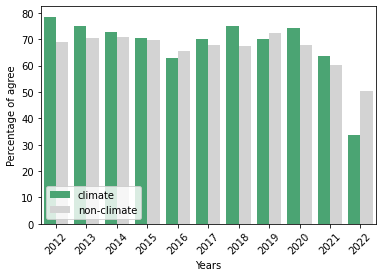

In [250]:
year_agree["Years"] = year_agree["year"]
year_agree["Percentage of agree"] = year_agree["Agree"]*100
g = sns.barplot(data=year_agree, x="Years", y="Percentage of agree", hue="y_pred", palette=["mediumseagreen", "lightgrey"])

plt.xticks(rotation=45)
plt.legend(loc="lower left")
year_agree2 = year_agree[:-1]
year_agree[year_agree["y_pred"]=="non-climate"].describe().reset_index()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '2012'),
  Text(1, 0, '2013'),
  Text(2, 0, '2014'),
  Text(3, 0, '2015'),
  Text(4, 0, '2016'),
  Text(5, 0, '2017'),
  Text(6, 0, '2018'),
  Text(7, 0, '2019'),
  Text(8, 0, '2020'),
  Text(9, 0, '2021'),
  Text(10, 0, '2022')])

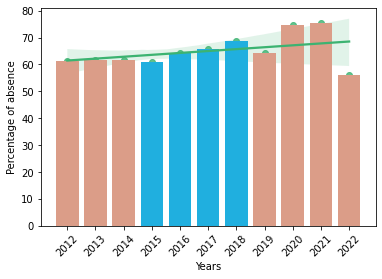

In [181]:
year_agree["Years"] = year_agree["year"]
year_agree["Percentage of absence"] = year_agree["Absence"]*100
g = sns.barplot(data=year_agree, x="Years", y="Percentage of absence", palette=['darksalmon', 'darksalmon', 'darksalmon', 'deepskyblue', 'deepskyblue', 'deepskyblue', 'deepskyblue', 'darksalmon', 'darksalmon', 'darksalmon'])
year_agree["Years"] = range(len(year_agree))
g = sns.regplot(x="Years", y="Percentage of absence", data=year_agree, color="mediumseagreen")

plt.xticks(rotation=45)

,index,Agree,Indifferent,Absence,Percentage of agree,Percentage of indifferent
0,count,11.000000,11.000000,11.000000,11.000000,11.000000
1,mean,0.678473,0.016338,0.645959,67.847302,1.633783
2,std,0.123475,0.011801,0.066894,12.347496,1.180068
3,min,0.335125,0.000000,0.508260,33.512545,0.000000
4,25%,0.667316,0.008106,0.614851,66.731562,0.810601
5,50%,0.706083,0.013771,0.638901,70.608348,1.377119
6,75%,0.746660,0.020670,0.682704,74.665989,2.067004
7,max,0.785704,0.040538,0.742649,78.570382,4.053827


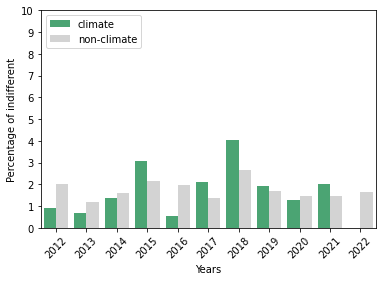

In [242]:
year_agree["Years"] = year_agree["year"]
year_agree["Percentage of indifferent"] = year_agree["Indifferent"]*100
g = sns.barplot(data=year_agree, x="Years", y="Percentage of indifferent", hue="y_pred", palette=["mediumseagreen", "lightgrey"])

plt.xticks(rotation=45)
plt.yticks(range(11))
plt.legend(loc="upper left")
year_agree2 = year_agree[:-1]
year_agree2[year_agree2["y_pred"]=="climate"].describe().reset_index()

In [187]:
year_agree.describe()

,Agree,Indifferent,Absence,Years,Percentage (%),Percentage of agree,Percentage of absence,Percentage of indifferent
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.671942,0.016866,0.649975,5.000000,67.194201,67.194201,64.997527,1.686604
std,0.091004,0.007319,0.059061,3.316625,9.100449,9.100449,5.906051,0.731944
min,0.420070,0.008302,0.560248,0.000000,42.007006,42.007006,56.024778,0.830221
25%,0.665923,0.013063,0.616053,2.500000,66.592345,66.592345,61.605263,1.306284
50%,0.711175,0.014793,0.641579,5.000000,71.117543,71.117543,64.157858,1.479251
75%,0.715458,0.017617,0.672228,7.500000,71.545815,71.545815,67.222821,1.761676
max,0.737973,0.033511,0.753090,10.000000,73.797303,73.797303,75.308990,3.351142


In [189]:
## Votes won / lost
result = pd.read_pickle("../climate_classifier/scored_data/votes_data_all.pkl")
result

,vote_id,description,votes,votes_by_party,vote_caller,url,description_text,date,y_pred
0,"Afstemning nr. 2, 2004-05 (1. samling)","[Fremsat:, 07-10-2004, Forslag til vedtagelse:...","{'party': ['Venstre (V)', 'Uden for folketings...","{'Absent': ['20', '17', '9', '8', '6', '5', '2...","[Frank Jensen (S), Holger K. Nielsen (SF), Lin...",https://www.ft.dk//samling/20041/afstemning/2.htm,"Idet Folketinget konstaterer,- at aftalen mell...",2004-10-07,non-climate
1,"Afstemning nr. 4, 2004-05 (1. samling)","[Sagsgang:, Fremsat (i betænkning) 19-10-2004,...","{'party': ['Venstre (V)', 'Uden for folketings...","{'Absent': ['14', '13', '6', '5', '0', '4', '2...",[Udvalget for Forretningsordenen (UFO)],https://www.ft.dk//samling/20041/afstemning/4.htm,Med folketingsbeslutningen giver Folketinget s...,2004-10-19,non-climate
2,"Afstemning nr. 5, 2004-05 (1. samling)","[Fremsat:, 22-10-2004, Forslag til vedtagelse:...","{'party': ['Venstre (V)', 'Uden for folketings...","{'Absent': ['18', '23', '8', '9', '4', '5', '2...","[Troels Lund Poulsen (V), Louise Frevert (DF),...",https://www.ft.dk//samling/20041/afstemning/5.htm,"Folketinget ser med tilfredshed, at arbejdet f...",2004-10-22,non-climate
3,"Afstemning nr. 6, 2004-05 (1. samling)","[Fremsat:, 22-10-2004, Forslag til vedtagelse:...","{'party': ['Venstre (V)', 'Uden for folketings...","{'Absent': ['18', '22', '8', '9', '4', '5', '2...","[Troels Lund Poulsen (V), Louise Frevert (DF),...",https://www.ft.dk//samling/20041/afstemning/6.htm,Folketinget opfordrer regeringen til at sætte ...,2004-10-22,non-climate
4,"Afstemning nr. 9, 2004-05 (1. samling)","[Fremsat:, 16-11-2004, Forslag til vedtagelse:...","{'party': ['Venstre (V)', 'Uden for folketings...","{'Absent': ['26', '20', '7', '8', '4', '6', '3...","[Hans Andersen (V), Charlotte Dyremose (KF), P...",https://www.ft.dk//samling/20041/afstemning/9.htm,"Folketinget konstaterer med tilfredshed, at re...",2004-11-16,non-climate
...,...,...,...,...,...,...,...,...,...
5554,"Afstemning nr. 285, 2021-22","[Sagsgang:, Fremsat 01-12-2021, 1. behandlet /...","{'party': ['Siumut (SIU)', 'Dansk Folkeparti (...","{'Absent': ['20', '12', '6', '6', '5', '4', '5...","[Skatteminister, Morten Bødskov (S)]",https://www.ft.dk//samling/20211/afstemning/28...,"Lovforslaget handler om, at Skatteforvaltninge...",2022-03-07,non-climate
5555,"Afstemning nr. 301, 2021-22","[Sagsgang:, Fremsat 18-11-2021, 1. behandlet /...","{'party': ['Siumut (SIU)', 'Dansk Folkeparti (...","{'Absent': ['19', '13', '6', '5', '5', '5', '4...","[Justitsminister, Nick Hækkerup (S)]",https://www.ft.dk//samling/20211/afstemning/30...,Lovforslaget har bl.a. til formål at bringe de...,2022-03-08,non-climate
5556,"Afstemning nr. 313, 2021-22","[Sagsgang:, Fremsat 15-12-2021, 1. behandlet /...","{'party': ['Siumut (SIU)', 'Dansk Folkeparti (...","{'Absent': ['22', '15', '6', '5', '4', '5', '4...","[Justitsminister, Nick Hækkerup (S)]",https://www.ft.dk//samling/20211/afstemning/31...,Lovforslaget har til formål at kriminalisere i...,2022-03-08,non-climate
5557,"Afstemning nr. 319, 2021-22","[Sagsgang:, Fremsat 06-10-2021, 1. behandlet/h...","{'party': ['Siumut (SIU)', 'Dansk Folkeparti (...","{'Absent': ['18', '12', '6', '4', '5', '5', '4...","[Jane Heitmann (V), Heidi Bank (V), Karen Elle...",https://www.ft.dk//samling/20211/afstemning/31...,"Beslutningsforslaget går ud på at sikre, at fl...",2022-03-15,non-climate
